# Table of Contents <a id='top'></a> 
                                                          

1. [Import Packages](#imports)<br>
2. [Define Functions](#functions)<br> 
3. [Conduct Experiments](#experiments)<br> 

---
## 1: Import Packages <a id='imports'></a> 
[jump to top](#top)<br>

In [1]:
# modules I created
from bidder import Bidder
from auction import Auction, User

# outside libraries
import pandas as pd

--- 
## 2: Define Functions <a id='functions'></a> 
[jump to top](#top)<br>

In [2]:
def run_experiment(auction):
    for i in range(auction.bidders[0].num_rounds):
        auction.execute_round()

In [3]:
def overview(auction, game_state_id = None):
    """Given a completed auction (an auction object for which .execute() has been repeatedly called),
    summarize the attributes of the bidders involved and indicate the final balance of each bidder"""
    
    dicty = {"auction_id": [],
             "bidder_id": [],
             "bidder_type": [],
             "alpha": [],
             "aggressiveness": [],
             "under_cut": [],
             "num_users": [],
             "final_balance": []}

    for bidder in auction.bidders:
        dicty["auction_id"].append(auction.auction_id)
        dicty["bidder_id"].append(bidder)
        dicty["bidder_type"].append(bidder.bidder_type)
        if bidder.bidder_type == "smart":
            dicty["alpha"].append(bidder.alpha)
            dicty["aggressiveness"].append(bidder.aggressiveness)
            dicty["under_cut"].append(bidder.under_cut)
        else:
            dicty["alpha"].append("NA")
            dicty["aggressiveness"].append("NA")
            dicty["under_cut"].append("NA")
        dicty["num_users"].append(len(auction.users))
        dicty["final_balance"].append(auction.balances[bidder])

    summary_df = pd.DataFrame(dicty)
    
    if game_state_id != None:
        summary_df["game_state_id"] = [game_state_id for i in range(len(summary_df))]
        return summary_df[["auction_id"] + ["game_state_id"] + ["bidder_id", "bidder_type", "alpha", "aggressiveness", "under_cut", "num_users", "final_balance"]]
    else:
        return summary_df


--- 
## 3: Conduct Experiments <a id='experiments'></a> 
[jump to top](#top)<br>

### Sample Experiment

In [4]:
users = [User() for i in range(10)]
bidders = [Bidder(num_users=10, num_rounds=1000, bidder_type="zero"),
          Bidder(num_users=10, num_rounds=1000, bidder_type="smart", alpha=0.1, aggressiveness=0.85, under_cut=0),
          Bidder(num_users=10, num_rounds=1000, bidder_type="smart", alpha=0.2, aggressiveness=0.85, under_cut=0),
          Bidder(num_users=10, num_rounds=1000, bidder_type="random")]

auction = Auction(users, bidders, 127)

run_experiment(auction)

In [5]:
overview(auction, game_state_id=33)

,auction_id,game_state_id,bidder_id,bidder_type,alpha,aggressiveness,under_cut,num_users,final_balance
0,127,33,<bidder.Bidder object at 0x118d15d50>,zero,NA,NA,NA,10,0.000000
1,127,33,<bidder.Bidder object at 0x108524310>,smart,0.1,0.85,0,10,-14.933387
2,127,33,<bidder.Bidder object at 0x10e396810>,smart,0.2,0.85,0,10,0.525856
3,127,33,<bidder.Bidder object at 0x10e394c90>,random,NA,NA,NA,10,-6.227769


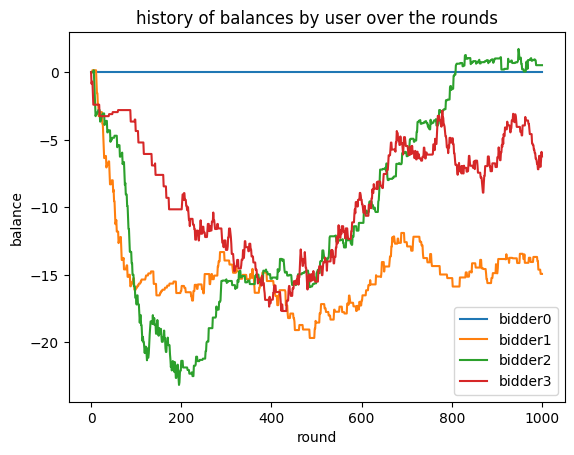

In [6]:
auction.plot_history()

In [20]:
alpha_levels = [i/10 for i in range(10)]
aggressiveness_levels = [i/20 for i in range(20)]
under_cut_levels = [i/20 for i in range(0, 5)]

In [24]:
dict_bidders = {"bidder_id":[], "alpha": [], "aggressiveness": [], "under_cut": []}

i = 0
for alpha in alpha_levels:
    for agg in aggressiveness_levels:
        for undercut in under_cut_levels:
            dict_bidders["bidder_id"].append(i)
            dict_bidders["alpha"].append(alpha)
            dict_bidders["aggressiveness"].append(agg)
            dict_bidders["under_cut"].append(undercut)
            i += 1
            
df_bidders = pd.DataFrame(dict_bidders)            
df_bidders

,bidder_id,alpha,aggressiveness,under_cut
0,0,0.0,0.00,0.00
1,1,0.0,0.00,0.05
2,2,0.0,0.00,0.10
3,3,0.0,0.00,0.15
4,4,0.0,0.00,0.20
...,...,...,...,...
995,995,0.9,0.95,0.00
996,996,0.9,0.95,0.05
997,997,0.9,0.95,0.10
998,998,0.9,0.95,0.15


**So I want to track the performance of each of these bidders across different combinations of other bidders as well as num_users**

In [18]:
import time

a = time.time()

for i in range(1000):
    run_experiment(auction)

b = time.time()

In [19]:
print(round(b-a, 2), "seconds")

12.85 seconds
